In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [83]:
df = pd.read_csv(os.path.join("lego_sets.csv"))
df.head()

,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,2.0,277,4.0,Catapult into action and take back the eggs fr...,75823,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,2.0,168,4.0,Launch a flying attack and rescue the eggs fro...,75822,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,11.0,74,4.3,Chase the piggy with lightning-fast Chuck and ...,75821,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,23.0,1032,3.6,Explore the architecture of the United States ...,21030,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,14.0,744,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [85]:
df.groupby('set_name')['star_rating'].mean().sort_values(ascending=False).head()

set_name
Lloyd            5.0
Mater´s Shed     5.0
Thanos           5.0
Lightning Jet    5.0
Little Plane     5.0
Name: star_rating, dtype: float64

In [86]:
df.groupby('set_name')['star_rating'].count().sort_values(ascending=False).head()

set_name
Chewbacca™                 63
Kylo Ren™                  63
Rey                        63
Thanos                     42
Garmadon's Volcano Lair    42
Name: star_rating, dtype: int64

In [87]:
ratings = pd.DataFrame(df.groupby('set_name')['star_rating'].mean())
ratings.head()

,star_rating
set_name,
1968 Ford Mustang Fastback,4.9
2016 Ford GT & 1966 Ford GT40,4.8
24 Hours Race Car,4.8
4 x 4 Response Unit,5.0
6x6 All Terrain Tow Truck,3.5


In [88]:
ratings['Number of Ratings'] = pd.DataFrame(df.groupby('set_name')['star_rating'].count())
ratings.head()

,star_rating,Number of Ratings
set_name,,
1968 Ford Mustang Fastback,4.9,21
2016 Ford GT & 1966 Ford GT40,4.8,20
24 Hours Race Car,4.8,2
4 x 4 Response Unit,5.0,21
6x6 All Terrain Tow Truck,3.5,21


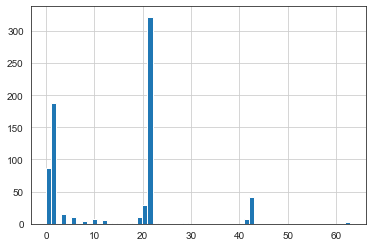

In [89]:
ratings['Number of Ratings'].hist(bins=60)

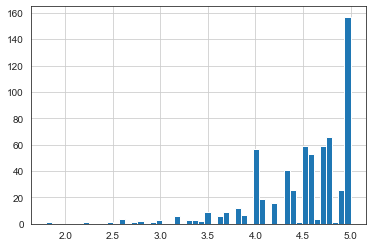

In [90]:
ratings['star_rating'].hist(bins=50)

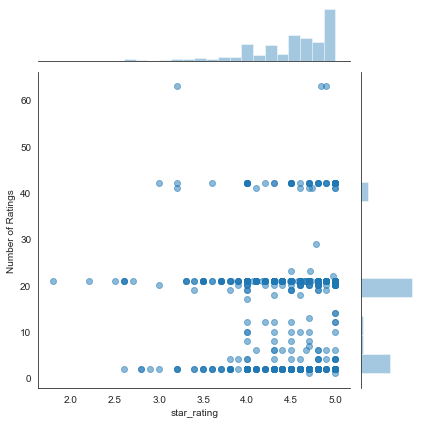

In [91]:
sns.jointplot(x='star_rating',y='Number of Ratings',data=ratings,alpha=0.5)

In [92]:
setreview = df.pivot_table(index='num_reviews',columns='set_name',values='star_rating')
setreview.head()

set_name,1968 Ford Mustang Fastback,2016 Ford GT & 1966 Ford GT40,24 Hours Race Car,4 x 4 Response Unit,6x6 All Terrain Tow Truck,A-Team™ Fun Pack,A-Wing Starfighter™,A-Wing™ vs. TIE Silencer™ Microfighters,ATM Heist Battle,ATV Arrest,...,Winter Village Station,Women of NASA,Wonder Woman™,Wonder Woman™ Warrior Battle,Y-Wing Starfighter™,Y-Wing™ Microfighter,Yoda's Hut,Yoda's Jedi Starfighter™,Zane Fun Pack,"garmadon, Garmadon, GARMADON!"
num_reviews,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,4.3,NaN,4.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,...,NaN,NaN,5.0,NaN,NaN,NaN,4.4,NaN,NaN,NaN


In [68]:
ratings.sort_values('Number of Ratings',ascending=False).head(10)

,star_rating,Number of Ratings
set_name,,
Chewbacca™,3.200000,63
Rey,4.900000,63
Kylo Ren™,4.833333,63
"garmadon, Garmadon, GARMADON!",4.900000,42
Smokey's Garage,4.500000,42
Owen & Blue,5.000000,42
Piranha Attack,3.600000,42
Green Ninja Mech Dragon,4.700000,42
Quake Mech,4.500000,42


In [69]:
ratings.head()

,star_rating,Number of Ratings
set_name,,
1968 Ford Mustang Fastback,4.9,21
2016 Ford GT & 1966 Ford GT40,4.8,20
24 Hours Race Car,4.8,2
4 x 4 Response Unit,5.0,21
6x6 All Terrain Tow Truck,3.5,21


In [71]:
ford_mustang_user_ratings =  ['1968 Ford Mustang Fastback']
ford_mustang_user_ratings .head()

num_reviews
1.0   NaN
2.0   NaN
3.0   NaN
4.0   NaN
5.0   NaN
Name: 1968 Ford Mustang Fastback, dtype: float64

In [72]:
similar_to_ford_mustang = setreview.corrwith(ford_mustang_user_ratings)

In [73]:
corr_of_set = pd.DataFrame(similar_to_ford_mustang,columns=['Correlation'])
corr_of_set.dropna(inplace=True)
corr_of_set.head()

,Correlation
set_name,
